<a href="https://colab.research.google.com/github/VictorSquidWei/IBM-Employee-Attrition-Prediction/blob/main/IBMHRProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IBM HR Analytics Employee Attrition Prediction with Ensemble Learning Methods**

### **Library Packages**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import files

### **Dataset description**

- Dataset: **IBM HR Analytics Employee Attrition & Performance**

- URL: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

- Description: This dataset contains information related to IBM employee attrition, providing insights into factors influencing employee turnover.

- Content:
    - Employee demographics: Age, gender, marital status, education, job role.
    - Work-related factors: Job satisfaction, performance ratings, work-life balance.
    - Attrition indicators: Attrition status, number of years at the company, distance from home.
    - Compensation details: Salary, monthly income.
    - Employee engagement: Relationship satisfaction, job involvement, training opportunities.

### **Data Imports**

In [3]:
upload_file = files.upload()
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### **Exploratory Data Analysis**

In [4]:
df.shape

(1470, 35)

In [5]:
#Contexualize individual data rows
display(df.iloc[0])

Age                                      41
Attrition                               Yes
BusinessTravel                Travel_Rarely
DailyRate                              1102
Department                            Sales
DistanceFromHome                          1
Education                                 2
EducationField                Life Sciences
EmployeeCount                             1
EmployeeNumber                            1
EnvironmentSatisfaction                   2
Gender                               Female
HourlyRate                               94
JobInvolvement                            3
JobLevel                                  2
JobRole                     Sales Executive
JobSatisfaction                           4
MaritalStatus                        Single
MonthlyIncome                          5993
MonthlyRate                           19479
NumCompaniesWorked                        8
Over18                                    Y
OverTime                        

In [6]:
#Verify data cleanliness
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [7]:
#Display basic descriptive statistics for numerical rows
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,"1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00"
mean,36.92,802.49,9.19,2.91,1.00,"1,024.87",2.72,65.89,2.73,2.06,2.73,"6,502.93","14,313.10",2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,"4,707.96","7,117.79",2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,"1,009.00","2,094.00",0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,"2,911.00","8,047.00",1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,"1,020.50",3.00,66.00,3.00,2.00,3.00,"4,919.00","14,235.50",2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,"1,157.00",14.00,4.00,1.00,"1,555.75",4.00,83.75,3.00,3.00,4.00,"8,379.00","20,461.50",4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,"1,499.00",29.00,5.00,1.00,"2,068.00",4.00,100.00,4.00,5.00,4.00,"19,999.00","26,999.00",9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


> A couple of columns that do not provide meaningful information for the purpose of this analysis:
* **EmployeeCount**: All the values are 1.
* **EmployeeNumber**: Sequential count.
* **StandardHours**: All the values are 80.

In [8]:
#Drop the undesirable columns
num_col = list(df.describe().columns)
col_categorical = list(set(df.columns).difference(num_col))
remove_list = ['EmployeeCount', 'EmployeeNumber', 'StandardHours']
col_numerical = [e for e in num_col if e not in remove_list]

<ipython-input-9-5ebc7ce5e570>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df[col_numerical].corr(), dtype=np.bool)


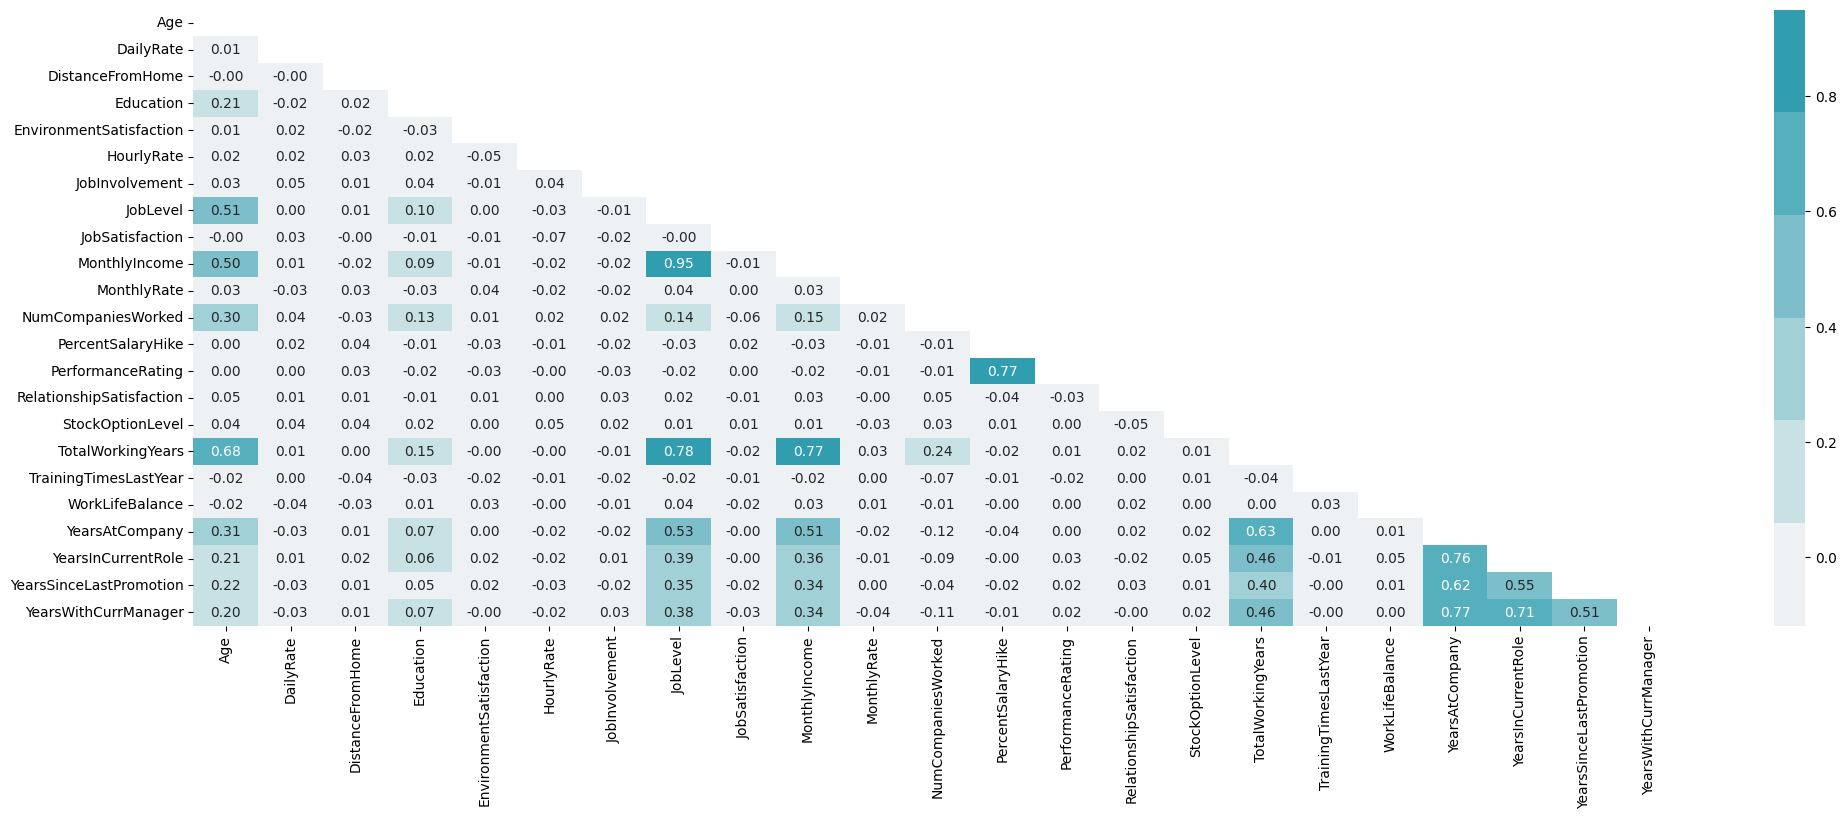

In [9]:
#Heatmap of the correlation matrix
plt.figure(figsize=(24,8))
mask = np.zeros_like(df[col_numerical].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.light_palette((210, 90, 60), input="husl")
sns.heatmap(df[col_numerical].corr(), mask=mask, cmap=cmap, annot=True, fmt=".2f");

### **Data Preparation**

In [10]:
# Attrition Mapping
attrition_to_num = {'Yes': 0,
                    'No': 1}
df['Attrition_num'] = df['Attrition'].map(attrition_to_num)

In [11]:
# One hot encoding
col_categorical.remove('Attrition')
df_cat = pd.get_dummies(df[col_categorical])
df_cat.head()

,Department_Human Resources,Department_Research & Development,Department_Sales,OverTime_No,OverTime_Yes,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,Over18_Y,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1
1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0
2,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1
3,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0
4,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1


In [12]:
# Combining numerical and categorical features into the feature matrix X
X = pd.concat([df[col_numerical], df_cat], axis=1)

# Creating the target variable y as 'Attrition_num' for employee attrition prediction
y = df['Attrition_num']

In [13]:
# Count y values
y.value_counts()

1    1233
0     237
Name: Attrition_num, dtype: int64

> The dataset is skewed towards the majority class (No employee attrition). This imbalance can potentially affect the performance of the decision tree classifier, as it may prioritize the majority class and overlook the minority class.

> First let us explore the performance of the model without addressing the class imbalance in the dataset, then we use two different methods to tackle class imbalance to see their effectiveness.

### **Basic Model Building and Performance Eval**

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report
from sklearn import preprocessing

In [15]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
# Train the model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    Helper function for displaying the performance metrics of the model on both
    the training set and the testing set.
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), lb.transform(res))))
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, res_test)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), lb.transform(res_test))))

In [18]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       194
           1       1.00      1.00      1.00       982

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176


Confusion Matrix: 
 [[194   0]
 [  0 982]]

ROC AUC: 1.0000

Test Result:

accuracy score: 0.7551

Classification Report: 
               precision    recall  f1-score   support

           0       0.23      0.28      0.25        43
           1       0.87      0.84      0.85       251

    accuracy                           0.76       294
   macro avg       0.55      0.56      0.55       294
weighted avg       0.78      0.76      0.77       294


Confusion Matrix: 
 [[ 12  31]
 [ 41 210]]

ROC AUC: 0.5579



> As we can see from the results, even though the model performed perfectly on the training set. The precision and recall of predicting zeros (Employee Attrition) is really poor.

***

#### **Utilizing class weights**

Assigning higher weights to the minority class during model training to make it more influential in the decision-making process.

***

In [19]:
# Define the class weights
class_weights = {0: 1, 1: 6}  # Increase weight for Class 0

# Train the model
clf2 = DecisionTreeClassifier(random_state=42, class_weight=class_weights)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 6}, random_state=42)

In [20]:
print_score(clf2, X_train, X_test, y_train, y_test, train=True)
print_score(clf2, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       194
           1       1.00      1.00      1.00       982

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176


Confusion Matrix: 
 [[194   0]
 [  0 982]]

ROC AUC: 1.0000

Test Result:

accuracy score: 0.7517

Classification Report: 
               precision    recall  f1-score   support

           0       0.22      0.28      0.25        43
           1       0.87      0.83      0.85       251

    accuracy                           0.75       294
   macro avg       0.55      0.56      0.55       294
weighted avg       0.78      0.75      0.76       294


Confusion Matrix: 
 [[ 12  31]
 [ 42 209]]

ROC AUC: 0.5559



***

#### **Balancing the dataset**

This involves undersampling of the majority class to create a balanced representation of both classes.

***

In [21]:
from sklearn.utils import resample

# Combine X_train and y_train
df_train = pd.concat([X_train, y_train], axis=1)

# Separate the majority and minority classes in the training set
df_majority = df_train[df_train['Attrition_num'] == 1]
df_minority = df_train[df_train['Attrition_num'] == 0]

# Undersample the majority class
df_majority_undersampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

In [22]:
# Combine the undersampled majority class with the minority class
df_train_balanced = pd.concat([df_majority_undersampled, df_minority])

# Separate X_train_balanced and y_train_balanced
X_train_balanced = df_train_balanced.drop('Attrition_num', axis=1)
y_train_balanced = df_train_balanced['Attrition_num']

# Train the model
clf3 = DecisionTreeClassifier(random_state=42)
clf3.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(random_state=42)

In [23]:
print_score(clf3, X_train_balanced, X_test, y_train_balanced, y_test, train=True)
print_score(clf3, X_train_balanced, X_test, y_train_balanced, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       194
           1       1.00      1.00      1.00       194

    accuracy                           1.00       388
   macro avg       1.00      1.00      1.00       388
weighted avg       1.00      1.00      1.00       388


Confusion Matrix: 
 [[194   0]
 [  0 194]]

ROC AUC: 1.0000

Test Result:

accuracy score: 0.5442

Classification Report: 
               precision    recall  f1-score   support

           0       0.16      0.51      0.25        43
           1       0.87      0.55      0.67       251

    accuracy                           0.54       294
   macro avg       0.52      0.53      0.46       294
weighted avg       0.76      0.54      0.61       294


Confusion Matrix: 
 [[ 22  21]
 [113 138]]

ROC AUC: 0.5307



### **Implementation of Ensemble Methods**
##### Despite previous attempts to boost performance, such as undersampling and class weights, there were no satisfactory results. The focus is shifted towards leveraging ensemble methods.

This section uses Bootstrap Aggregating, Random Forest, and Gradient Boosting Classifier with grid search cv. Classification reports of the above methods are displayed.

***
#### **Bootstrap Aggregating**
***

In [24]:
from sklearn.ensemble import BaggingClassifier
base_estimator = DecisionTreeClassifier(random_state=42)
bag_clf = BaggingClassifier(base_estimator = base_estimator, random_state=42)

**Grid Search**

In this parameter grid:

- `n_estimators`: Number of base estimators explore the impact of ensemble size.
- `max_samples` and `max_features`: Proportion of samples and features to consider for each base estimator.
- `bootstrap`: Evaluating both bootstrapping (with replacement) and non-bootstrapping.
- `base_estimator__max_depth` and `base_estimator__min_samples_split`: Parameters of the base estimator

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0],
    'bootstrap': [True, False],
    'base_estimator__max_depth': [None, 5, 10],
    'base_estimator__min_samples_split': [2, 5, 10]
}

In [26]:
grid_search_bag = GridSearchCV(bag_clf, param_grid, n_jobs=-1, cv=5, scoring='accuracy')

In [27]:
grid_search_bag.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                                         random_state=42),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [None, 5, 10],
                         'base_estimator__min_samples_split': [2, 5, 10],
                         'bootstrap': [True, False],
                         'max_features': [0.5, 0.8, 1.0],
                         'max_samples': [0.5, 0.8, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [28]:
best_estimator_bag = grid_search_bag.best_estimator_
best_estimator_bag.get_params()

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 10,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 5,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': 42,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42),
 'bootstrap': False,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 0.5,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

The best estimator from the grid search is a BaggingClassifier with the following key hyperparameters:

- `n_estimators`: 50
- `max_samples`: 0.5
- `max_features`: 1.0
- `bootstrap`: False
- `base_estimator__max_depth`: 10
- `base_estimator__min_samples_split`: 5


In [29]:
print_score(best_estimator_bag, X_train, X_test, y_train, y_test, train=True)
print_score(best_estimator_bag, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9609

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.77      0.87       194
           1       0.96      1.00      0.98       982

    accuracy                           0.96      1176
   macro avg       0.97      0.88      0.92      1176
weighted avg       0.96      0.96      0.96      1176


Confusion Matrix: 
 [[149  45]
 [  1 981]]

ROC AUC: 0.8835

Test Result:

accuracy score: 0.8537

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.19      0.27        43
           1       0.87      0.97      0.92       251

    accuracy                           0.85       294
   macro avg       0.69      0.58      0.59       294
weighted avg       0.82      0.85      0.82       294


Confusion Matrix: 
 [[  8  35]
 [  8 243]]

ROC AUC: 0.5771



***
#### **Random Forest**
***

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

**Grid Search**

In this parameter grid:
    
- `n_estimators`: Number of decision trees in the forest.
- `criterion`: Splitting criterion between Gini impurity ('gini') and information gain ('entropy').
- `max_depth`: Maximum depth of the trees, allowing control of complexity.
- `min_samples_split`: Minimum number of samples required to split an internal node.
- `min_samples_leaf`: Minimum number of samples required to be at each leaf node.
- `max_features`: Maximum number of features.
- `class_weight`: Assigning weights to the classes (None for no weighting and 'balanced' for automatically adjusting weights).

In [31]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

In [32]:
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, n_jobs=-1, cv=5, scoring='accuracy')

In [33]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [34]:
best_estimator_rf = grid_search_rf.best_estimator_
best_estimator_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

After performing a grid search with the provided `param_grid` on the Random Forest model, the best estimator was found with the following parameter values:

- `n_estimators`: 100
- `criterion`: 'gini'
- `max_depth`: None
- `min_samples_split`: 10
- `min_samples_leaf`: 1
- `max_features`: 'auto'
- `class_weight`: 'balanced'

In [35]:
print_score(best_estimator_rf, X_train, X_test, y_train, y_test, train=True)
print_score(best_estimator_rf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9881

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       194
           1       1.00      0.99      0.99       982

    accuracy                           0.99      1176
   macro avg       0.97      0.98      0.98      1176
weighted avg       0.99      0.99      0.99      1176


Confusion Matrix: 
 [[190   4]
 [ 10 972]]

ROC AUC: 0.9846

Test Result:

accuracy score: 0.8605

Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.28      0.37        43
           1       0.89      0.96      0.92       251

    accuracy                           0.86       294
   macro avg       0.72      0.62      0.65       294
weighted avg       0.84      0.86      0.84       294


Confusion Matrix: 
 [[ 12  31]
 [ 10 241]]

ROC AUC: 0.6196



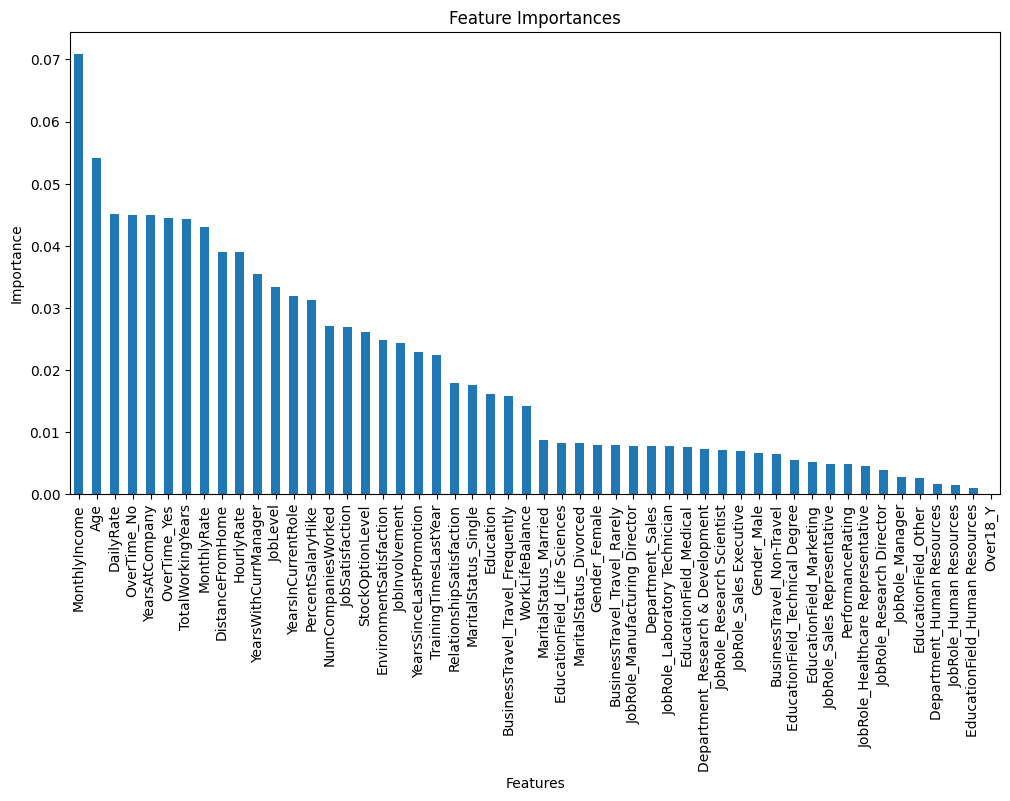

In [36]:
# Bar plot for feature importance of the Random Forest Classifier
feature_importances = best_estimator_rf.feature_importances_
feature_importances_series = pd.Series(feature_importances, index=X_train.columns)
feature_importances_series = feature_importances_series.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
feature_importances_series.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

***
####**Gradient Boosting**
***

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier(random_state=42)

**Grid Search**

In this parameter grid:
- `n_estimators`: Number of boosting stages (decision trees) in the gradient boosting ensemble.
- `learning_rate`: Control the contribution of each tree in the ensemble.
- `max_depth`: Control the complexity of the model.
- `min_samples_split`: Minimum number of samples required to split an internal node during tree construction.
- `min_samples_leaf`: Minimum number of samples required to be at each leaf node.
- `max_features`: Maximum number of features to consider for the best split.
- `subsample`: The fraction of samples to be used for fitting each individual tree.

In [38]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'subsample': [0.8, 1.0],
}

In [39]:
grid_search_gb = GridSearchCV(gbc_clf, param_grid, n_jobs=-1, cv=5, scoring='accuracy')

In [40]:
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [42]:
best_estimator_gb = grid_search_gb.best_estimator_
best_estimator_gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 0.8,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [44]:
print_score(best_estimator_gb, X_train, X_test, y_train, y_test, train=True)
print_score(best_estimator_gb, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.9838

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95       194
           1       0.98      1.00      0.99       982

    accuracy                           0.98      1176
   macro avg       0.99      0.95      0.97      1176
weighted avg       0.98      0.98      0.98      1176


Confusion Matrix: 
 [[175  19]
 [  0 982]]

ROC AUC: 0.9510

Test Result:

accuracy score: 0.8776

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.28      0.40        43
           1       0.89      0.98      0.93       251

    accuracy                           0.88       294
   macro avg       0.80      0.63      0.67       294
weighted avg       0.86      0.88      0.85       294


Confusion Matrix: 
 [[ 12  31]
 [  5 246]]

ROC AUC: 0.6296

